In [121]:
PRIME = 3329499024484696430955445194464218832905973351121497617435753366182222251575714808510036328892050841

def random_coprime(n):
    x, i = 0, 0
    while gcd(x, n) != 1:
        i = i + 1
        x = randint(2, n-1)
    return x, i

a = []
for _ in range(100000):
    x, i = random_coprime(PRIME-1)
    a.append(i)
    
    
print(float(mean(a)))

3.74542


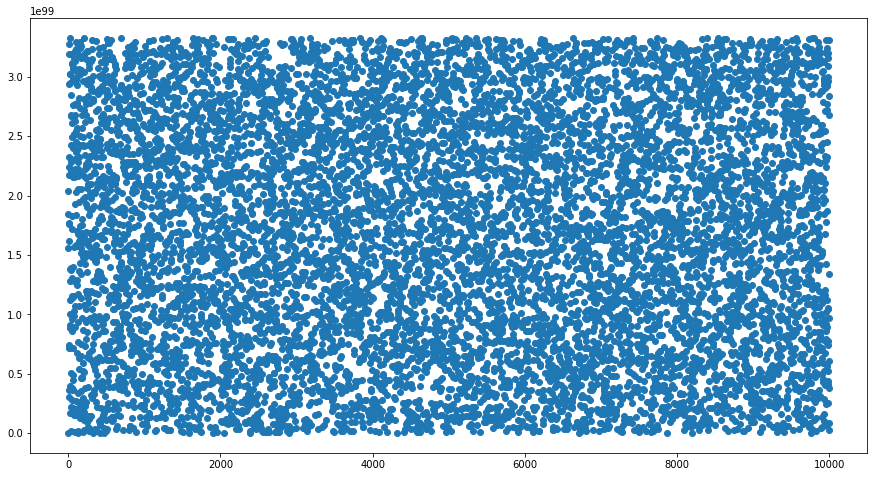

In [43]:
import matplotlib.pyplot as plt

NSAMPLES = 10000
# PRIME = random_prime(10000, lbound=2322)
PRIME = 3329499024484696430955445194464218832905973351121497617435753366182222251575714808510036328892050841

x = []
for _ in range(NSAMPLES):
    x.append(random_coprime(PRIME-1)[0])
    
plt.figure(figsize=(15,8))
plt.scatter(range(len(x)), x)

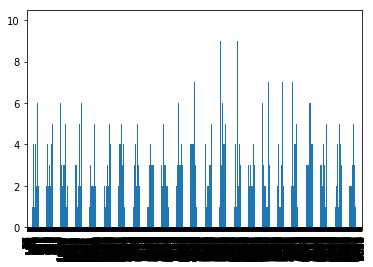

In [42]:
from pandas import Series

s = Series(x)

vc = s.value_counts()
vc = vc.sort_index()

vc.plot(kind='bar')

In [5]:
def random_coprime(n):
    '''
    Devolve um número x coprimo em relação a n tal que gcd(x, n) = 1.
    '''
    x = 0

    while gcd(x, n) != 1:
        x = randint(2, n-1)
    
    return x

In [6]:
def elgamal_keygen():

    # Calcula os valores abaixo como explicado
    secret_key = randint(1, PRIME-2)
    public_key = power_mod(GENERATOR, secret_key, PRIME)

    return secret_key, public_key

In [7]:
def elgamal_sign(message, secret_key):
    # Zp = Integers(PRIME-1)
    k = Zp1(random_coprime(PRIME-1))

    message = int(message, 16)
    
    g = Zp(GENERATOR)
    
    # Calcula os valores abaixo como explicado
    r = g^k
    rp1 = Zp1(r)
    # possivel problema em s
    s = (message - secret_key * rp1) * k^(-1)

    return (r, s)


def elgamal_verify(signature, message, public_key):
    r, s = signature
    
    message = int(message, 16)
    
    g = Zp(GENERATOR)
    pk = Zp(public_key)
    
    if 1 <= int(r) <= PRIME-1:
        a = g^message
        b = pk^r * r^s
        
        return True if a == b else False

    # Deve devolver True se assinatura for válida e False se não for
    return False

In [8]:
PRIME = 3329499024484696430955445194464218832905973351121497617435753366182222251575714808510036328892050841
GENERATOR = 17

Zp = Integers(PRIME)
Zp1 = Integers(PRIME-1)

In [9]:
sec, pub = elgamal_keygen()
sec, pub

(2757257716227880143652717821938312516969220386670002274911169046677900321140871227890891542042432557L,
 2427057240793211334926042248708300001497545008006967162901924168142818007646926843355007051377407776)

In [10]:
message = 326
sig = elgamal_sign(message, sec)
sig

TypeError: int() can't convert non-string with explicit base

In [117]:
elgamal_verify(sig, 326, pub)

True

In [118]:
elgamal_verify(sig, 324, pub)

False

## Seguindo estrutura do EP

In [32]:
def get_binary_representation_512_bits_of_hex(h):
    '''
    Recebe uma string h representando um hexadecimal.
    Devolve a representação binária de h com EXATAMENTE 512 bits
    '''

    bin_h = bin(int(h, 16))[2:]  # [2:] Tira o 0b da frente
    bin_h_512bits = '0' * (512 - len(bin_h)) + bin_h

    return bin_h_512bits

def hamming_distance_with_hex_strings(h1, h2):
    """
    Calcula a distância de hamming entre dois hashes em STRINGS representando
    hexadecimais
    """

    bin_h1 = get_binary_representation_512_bits_of_hex(h1)
    bin_h2 = get_binary_representation_512_bits_of_hex(h2)

    #bin_h1 = ascii_to_bin(h1)
    #bin_h2 = ascii_to_bin(h2)

    #int_h1 = int(h1, 16)
    #int_h2 = int(h2, 16)
    
    #count = 0
    #xor = int_h1^^int_h2
    
    #while xor:
    #    count += 1
    #    xor &= (xor - 1)
    #return count
    
    
    distance = 0
    for x1, x2 in zip(bin_h1, bin_h2):
        if x1 != x2:
            distance += 1
    return distance
    

In [12]:
doc1 = u'527135494a1ffa82bc88'
doc2 = u'527135495a1ffa82bc88'

In [13]:
alice_secret, alice_public = elgamal_keygen()
beto_secret, beto_public = elgamal_keygen()

In [14]:
import hashlib

hash1 = hashlib.sha512(doc1).hexdigest()
hash2 = hashlib.sha512(doc2).hexdigest()

In [15]:
hamming_distance_with_hex_strings(hash1, hash2)

256

In [16]:
assinaturaHash1 = elgamal_sign(hash1, alice_secret)
assinaturaHash2 = elgamal_sign(hash2, alice_secret)

In [17]:
elgamal_verify(assinaturaHash1, hash1, alice_public)

True

In [18]:
elgamal_verify(assinaturaHash1, hash2, alice_public)

False

In [1]:
PRIME = 3329499024484696430955445194464218832905973351121497617435753366182222251575714808510036328892050841
len(str(PRIME))

100

#### 9.

In [19]:
def sha512_file(filepath):
    BLOCK_SIZE = 65536  # = 64Kb

    file_hash = hashlib.sha512()
    with open(filepath, 'rb') as f:
        fb = f.read(BLOCK_SIZE)
        while len(fb) > 0:
            file_hash.update(fb)
            fb = f.read(BLOCK_SIZE)

    return file_hash.hexdigest()

In [22]:
hashA = sha512_file('documento.txt')

In [24]:
assinaturaHashA = elgamal_sign(hashA, sec)
assinaturaHashA

(3149322647200843752537347898447090335780120590744940535213633873476492749982125163247956653290940461,
 1341419779778127691619255691743181001558596461577804707041668879821794710423547004050964232072995594)

In [25]:
elgamal_verify(assinaturaHashA, hashA, pub)

True

In [26]:
hashA_mod = sha512_file('documento_modificado.txt')

In [27]:
assinaturaHashA_mod = elgamal_sign(hashA_mod, sec)
assinaturaHashA_mod

(344810640356007002123113388179859545065634701015157529081359776635318738391225270187861525488437296,
 761111444121115397226161664267068111344977284190628789563817617215851806495401431419131731349807875)

In [43]:
def hamming(a, b):
    count = 0
    xor = int(a)^^int(b)
    
    while xor:
        count += 1
        xor &= (xor - 1)
    return count

In [44]:
hamming(assinaturaHashA[0], assinaturaHashA_mod[0])

160

In [45]:
hamming(assinaturaHashA[1], assinaturaHashA_mod[1])

157

In [1]:
PRIME = 3329499024484696430955445194464218832905973351121497617435753366182222251575714808510036328892050841
GENERATOR = 17

In [3]:
Zp = Integers(PRIME)
Zp

Ring of integers modulo 3329499024484696430955445194464218832905973351121497617435753366182222251575714808510036328892050841

In [16]:
r = randint(1, PRIME-2)
r

1172569356318578210597071615944280928527215572409006833723114503196586108628795757252471747041552202L

In [17]:
g = Zp(GENERATOR)
k = g^r

g, r, k

(17,
 1172569356318578210597071615944280928527215572409006833723114503196586108628795757252471747041552202L,
 2747531430838798300597125525192842506267774814346888240989258433576961184861534163773453356279959703)

In [20]:
def get_random_coprime(n, g):
    Zn = Integers(n)
    g = Zn(g)
    r = randint(1, n-2)
    
    return g^r

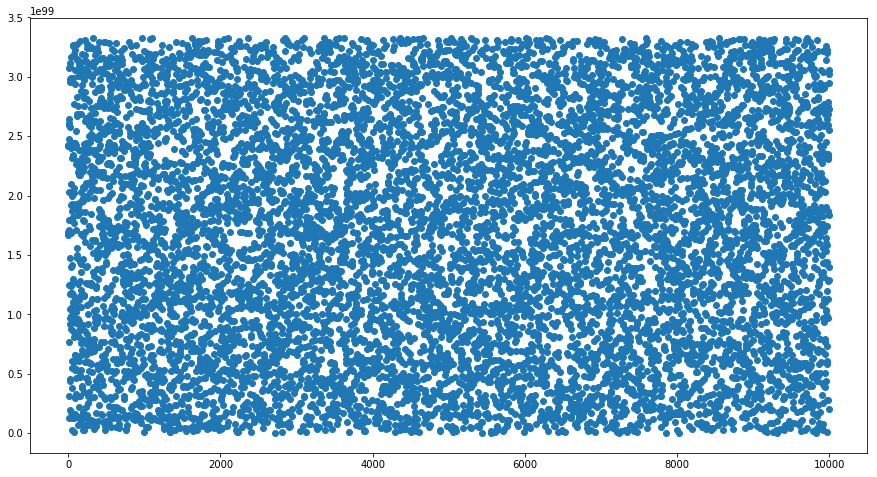

In [21]:
import matplotlib.pyplot as plt

NSAMPLES = 10000
# PRIME = random_prime(10000, lbound=2322)
PRIME = 3329499024484696430955445194464218832905973351121497617435753366182222251575714808510036328892050841

x = []
for _ in range(NSAMPLES):
    x.append(get_random_coprime(PRIME, GENERATOR))
    
plt.figure(figsize=(15,8))
plt.scatter(range(len(x)), x)

In [112]:
PRIME512 = random_prime(2^512 - 1, proof=True, lbound=2^511)
PRIME512

12637605196018713070344024070559107270222392636771841277241890397335519948617721264222435838004088482001906984571037477049776352675510413355478433564714789

In [113]:
Zp = Integers(PRIME512)
g = Zp.multiplicative_generator()
g

6

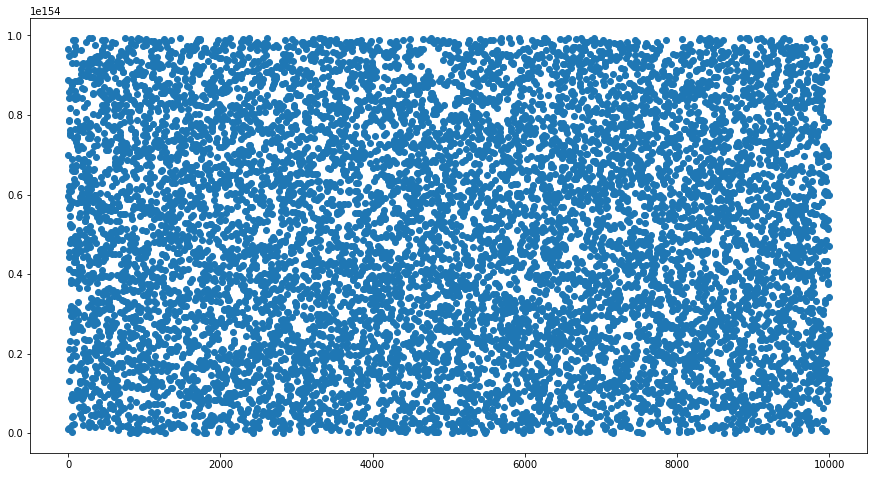

In [49]:
import matplotlib.pyplot as plt

NSAMPLES = 10000
# PRIME = random_prime(10000, lbound=2322)
PRIME = 3329499024484696430955445194464218832905973351121497617435753366182222251575714808510036328892050841

x = []
for _ in range(NSAMPLES):
    x.append(get_random_coprime(PRIME512, g))
    
plt.figure(figsize=(15,8))


plt.scatter(range(len(x)), x)

In [81]:
c = 0

for i in range(1000000):
    x = randint(1, PRIME-2)
    if gcd(g^x, PRIME-1) != 1:
        c += 1
        
print(c)

KeyboardInterrupt: 

In [125]:
Zp = Integers(17)

In [126]:
a = Zp(243)

In [127]:
b = Zp(327392)

In [131]:
a

5